## package:
https://github.com/mikedh/trimesh

In [1]:

from import_OBJ import importOBJ
import trimesh
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## ColorMap
### use matplotlib to create colormap

Text(0.5,1,'jet')

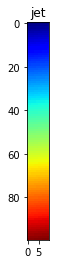

In [2]:
import matplotlib
import matplotlib.pyplot as plt

ckey='jet' # hot, hsv
cmap =plt.get_cmap(ckey)

rand_num = np.arange(0,1,0.001)
# get RGB-A color
rand_color = cmap(rand_num)
rand_color = rand_color.reshape(100,-1,4)

# show
plt.imshow(rand_color)
plt.title(ckey)


### Show Mesh

In [3]:
mesh = trimesh.load('./camelhead_simple.obj')
mesh.show()

In [4]:
layer_name, ismanifold, points, edges, faces, efaces, fvertices = importOBJ('./camelhead_simple.obj')

## Load C,M from cache

In [5]:
with open('lbmat.txt', 'r') as fin:
    lines = fin.readlines()
print(len(lines))
toks = lines[0].strip().split(',')

toks_float=[ float(t) for t in toks if len(t)]
print('done')

1
done


In [6]:
vnum = len(points)
L = np.array(toks_float).reshape(vnum,vnum)

## show mean curvature

In [7]:
from get_parula_map import get_parula_map

def compute_H(L , vex):
    Hn=-0.5*L @ vex
    H = np.linalg.norm(Hn, axis=1) 
    
    print('H:',H.shape)
    return H

H = compute_H(L, points)
H_nv= 2.0* H / (np.max(H)-np.min(H));

H: (2529,)


In [8]:
# get color
cmap=get_parula_map()
vex_rgba = cmap(H_nv)
print(vex_rgba.shape)

# visualize H
vmesh = trimesh.Trimesh(vertices=points, vertex_colors=vex_rgba, faces=fvertices)
# save out 
vmesh.export('vis_mesh.ply')
vmesh.show()

(2529, 4)
